# Hypothèse : Les films en langue non anglaise ont des revenus moyens inférieurs à ceux des films en langue anglaise.

#### Importation des bibliothèques nécessaires

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

## Chargement des données

In [16]:
# Les chemins vers les fichiers CSV
fichier_movie = 'data/movies_metadata.csv'

# Lecture des fichiers CSV
data_movie = pd.read_csv(fichier_movie, sep=',', encoding='latin-1', low_memory=False)

## Aperçu des données

In [17]:
print("\nAperçu des données Movies :")
data_movie.head()


Aperçu des données Movies :


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Nettoyage et préparation des données

In [18]:
# Filtrage des colonnes nécessaires
data_movie = data_movie[['original_language', 'revenue']]
# Fusion des deux jeux de données sur l'identifiant de l'accident

# Suppression des valeurs manquantes
data = data_movie.dropna()
data.head()

,original_language,revenue
0,en,373554033.0
1,en,262797249.0
2,en,0.0
3,en,81452156.0
4,en,76578911.0


In [19]:
data.tail()

,original_language,revenue
45461,fa,0.0
45462,tl,0.0
45463,en,0.0
45464,en,0.0
45465,en,0.0


In [20]:
data = data[data['revenue'] > 0]
data

,original_language,revenue
0,en,373554033.0
1,en,262797249.0
3,en,81452156.0
4,en,76578911.0
5,en,187436818.0
...,...,...
45399,ru,3.0
45401,ru,50656.0
45409,en,1328612.0
45412,en,1268793.0


In [21]:
# Créer deux groupes : films en anglais et non anglais
english_movies = data[data['original_language'] == 'en']
non_english_movies = data[data['original_language'] != 'en']

In [22]:
non_english_movies

,original_language,revenue
28,fr,1738611.0
110,cn,32392047.0
210,ru,2616503.0
228,zh,7294403.0
261,es,21665468.0
...,...,...
45265,sv,1359497.0
45381,ru,320395.0
45399,ru,3.0
45401,ru,50656.0


In [23]:
avg_revenue_english = english_movies['revenue'].mean()
avg_revenue_non_english = non_english_movies['revenue'].mean()

print(f"Revenu moyen des films en anglais : {avg_revenue_english}")
print(f"Revenu moyen des films non anglais : {avg_revenue_non_english}")

Revenu moyen des films en anglais : 77022088.24874134
Revenu moyen des films non anglais : 19034782.97148289


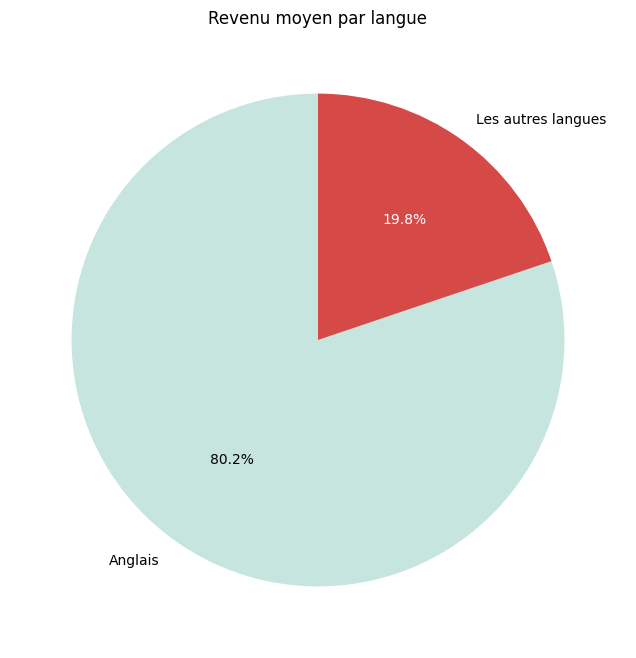

In [32]:
labels = ['Anglais', 'Les autres langues']
revenues = [avg_revenue_english, avg_revenue_non_english]

# Custom function for changing text color
def autopct_format(pct):
    return ('%.1f%%' % pct)

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    revenues,
    labels=labels,
    colors=['#c5e5de', '#d54946'],  # Set the colors
    autopct=autopct_format,
    startangle=90
)

# Adjust text colors for better visibility
for i, autotext in enumerate(autotexts):
    if wedges[i].get_facecolor() == (0.8352941176470589, 0.28627450980392155, 0.27450980392156865, 1.0):  # RGB for #d54946
        autotext.set_color('white')  # Set white for red slice
    else:
        autotext.set_color('black')  # Set black for other slices

plt.title('Revenu moyen par langue')
plt.show()
